<a href="https://colab.research.google.com/github/MDelibero/public/blob/main/Analisi_dati_istruzione_italia_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import geopandas as gpd

from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import MultiPolygon

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Reg01012023_g_WGS84.dbf to Reg01012023_g_WGS84.dbf
Saving Reg01012023_g_WGS84.prj to Reg01012023_g_WGS84.prj
Saving Reg01012023_g_WGS84.shp to Reg01012023_g_WGS84 (1).shp
Saving Reg01012023_g_WGS84.shx to Reg01012023_g_WGS84.shx


In [ ]:
# Specifica il nome del file .shp senza l'estensione
file_name = "Reg01012023_g_WGS84"

# Carica il file shapefile in un GeoDataFrame
italy_shape = gpd.read_file(f"{file_name}.shp")

In [ ]:
italy_shape['DEN_REG'].unique()

array(['Piemonte', "Valle d'Aosta", 'Lombardia', 'Trentino-Alto Adige',
       'Veneto', 'Friuli Venezia Giulia', 'Liguria', 'Emilia-Romagna',
       'Toscana', 'Umbria', 'Marche', 'Lazio', 'Abruzzo', 'Molise',
       'Campania', 'Puglia', 'Basilicata', 'Calabria', 'Sicilia',
       'Sardegna'], dtype=object)

In [ ]:
url = "http://dati.ustat.miur.it/dataset/14aeb712-4665-4311-9e90-3e13639e8f50/resource/fa028588-c0a3-4dc3-a73f-915162ed99b4/download/14a_immatricolatixresidenzasedecorsogruppo.csv"
df_immatricolati_geo = pd.read_csv(url, encoding='iso-8859-1', sep=';')

regioni_da_escludere = ['REGIONE ESTERA', 'REGIONE NON FORNITA']

df_immatricolati_geo = df_immatricolati_geo[(df_immatricolati_geo['AnnoA'] == '2020/2021') & (~df_immatricolati_geo.RegioneRES.isin(regioni_da_escludere))]


rename_dict = {
    'ABRUZZO': 'Abruzzo',
    'BASILICATA': 'Basilicata',
    'CALABRIA': 'Calabria',
    'CAMPANIA': 'Campania',
    'EMILIA ROMAGNA': 'Emilia-Romagna',
    'FRIULI VENEZIA GIULIA': 'Friuli Venezia Giulia',
    'LAZIO': 'Lazio',
    'LIGURIA': 'Liguria',
    'MARCHE': 'Marche',
    'MOLISE': 'Molise',
    'PIEMONTE': 'Piemonte',
    'PUGLIA': 'Puglia',
    'Provincia autonoma di Bolzano': 'Trentino-Alto Adige',
    'Provincia autonoma di TRENTO': 'Trentino-Alto Adige',
    'SARDEGNA': 'Sardegna',
    'SICILIA': 'Sicilia',
    'TOSCANA': 'Toscana',
    'UMBRIA': 'Umbria',
    'LOMBARDIA': 'Lombardia',
    'VALLE D\'AOSTA': 'Valle d\'Aosta',
    'VENETO': 'Veneto'
}

df_immatricolati_geo['DEN_REG'] = df_immatricolati_geo['RegioneRES'].replace(rename_dict)



immatricolati_per_regione = df_immatricolati_geo.groupby(['DEN_REG']).agg(immatricolazioni=('Imm', 'sum')).reset_index()


den = immatricolati_per_regione.immatricolazioni.sum(axis=0)
immatricolati_per_regione['%immatricolazioni'] = (immatricolati_per_regione['immatricolazioni'] /  den)*100
immatricolati_per_regione['%immatricolazioni'] = immatricolati_per_regione['%immatricolazioni'].round().astype(int)

immatricolati_per_regione



,DEN_REG,immatricolazioni,%immatricolazioni
0,Abruzzo,7589,2
1,Basilicata,3490,1
2,Calabria,11124,3
3,Campania,34863,11
4,Emilia-Romagna,22644,7
5,Friuli Venezia Giulia,6148,2
6,Lazio,34975,11
7,Liguria,8058,2
8,Lombardia,49440,15
9,Marche,8639,3


In [ ]:
geo_plot_ita = italy_shape.merge(immatricolati_per_regione, how='left', on='DEN_REG')


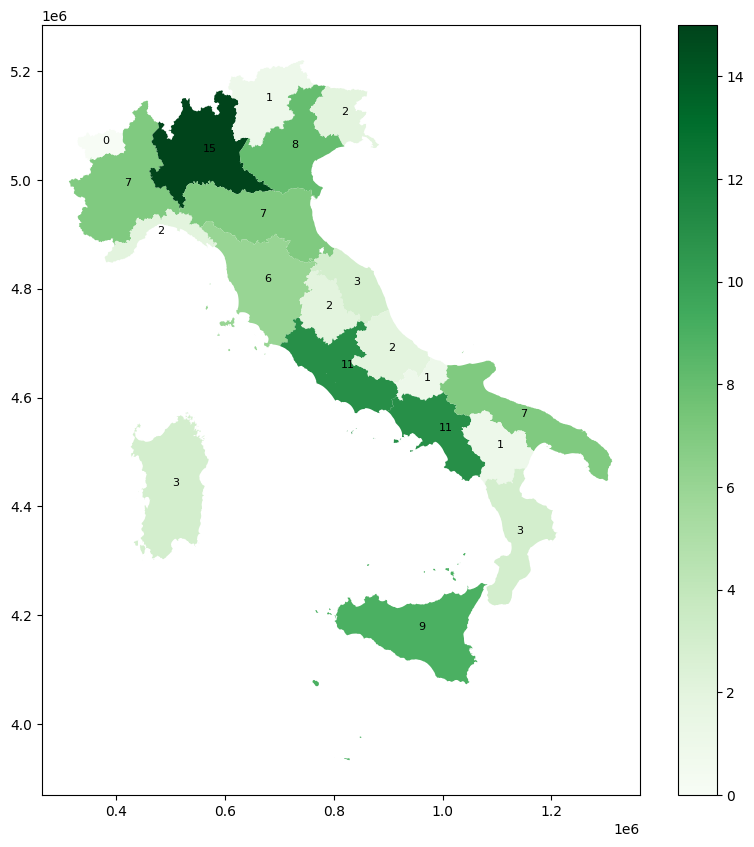

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
geo_plot_ita.plot(ax=ax, column = '%immatricolazioni', cmap='Greens', legend= True)

for idx, row in geo_plot_ita.iterrows():
    value = row['%immatricolazioni']  # Sostituisci con il nome effettivo della colonna
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.annotate(f"{value}", xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize=8, color='black')

plt.show()

Text(0, 0.5, '#Immatricolazioni in K')

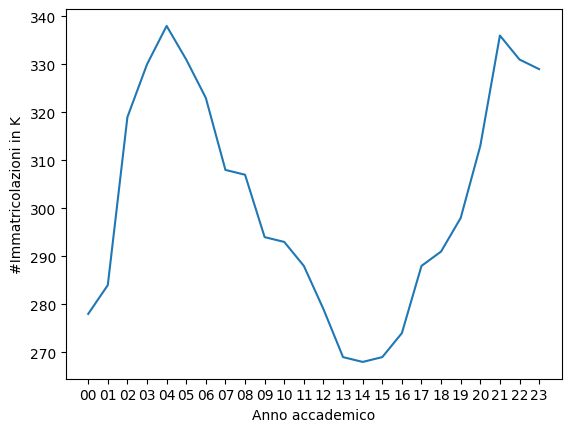

In [ ]:

url = "http://dati.ustat.miur.it/dataset/14aeb712-4665-4311-9e90-3e13639e8f50/resource/c39e6e60-d92e-46f2-bfaa-f865d3fb1771/download/01_immatricolatixanno.csv"

df_immatricolazioni_totali = pd.read_csv(url, sep=';')

df_immatricolazioni_totali['anno'] = df_immatricolazioni_totali['AnnoA'].apply(lambda x: x[-2:])
df_immatricolazioni_totali['immatricolazioni_totali'] = pd.to_numeric(df_immatricolazioni_totali['Imm'].astype(str).str[:3])
df_immatricolazioni_totali['immatricolazioni_maschi'] = pd.to_numeric(df_immatricolazioni_totali['Imm_M'].astype(str).str[:3])
df_immatricolazioni_totali['immatricolazioni_femmine'] = pd.to_numeric(df_immatricolazioni_totali['Imm_F'].astype(str).str[:3])
df_immatricolazioni_totali = df_immatricolazioni_totali[df_immatricolazioni_totali['anno']!='99']
df_immatricolazioni_totali = df_immatricolazioni_totali.sort_values('anno')



plt.plot(df_immatricolazioni_totali['anno'], df_immatricolazioni_totali['immatricolazioni_totali'], label='Immatricolazioni Tot.')
plt.xlabel('Anno accademico')
plt.ylabel('#Immatricolazioni in K')

<ipython-input-3-3b86af866c00>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['%immatricolazioni'] = (df_filtered['immatricolazioni'] /  den)*100
<ipython-input-3-3b86af866c00>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['%immatricolazioni'] = (df_filtered['immatricolazioni'] /  den)*100
<ipython-input-3-3b86af866c00>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

<function matplotlib.pyplot.show(close=None, block=None)>

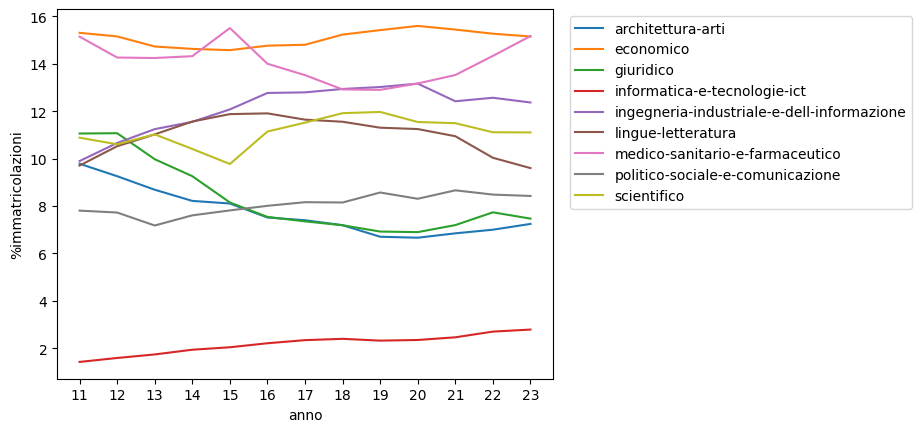

In [ ]:
url = "http://dati.ustat.miur.it/dataset/14aeb712-4665-4311-9e90-3e13639e8f50/resource/81536e13-c15d-4be4-8a12-c74367233bc0/download/03_immatricolatixgruppo.csv"

df_immatricolazioni_per_gruppo = pd.read_csv(url, sep=';')

df_immatricolazioni_per_gruppo['anno'] = df_immatricolazioni_per_gruppo['AnnoA'].apply(lambda x: x[-2:])

def assegna_gruppo(row):
    if 'Arte e Design' in row['Nome Gruppo Disciplinare']:
        return "Architettura / Arti"
    elif 'Architettura e Ingegneria civile' in row['Nome Gruppo Disciplinare']:
        return "Architettura / Arti"
    elif 'Letterario-Umanistico' in row['Nome Gruppo Disciplinare']:
        return "Lingue / Letteratura"
    elif 'Linguistico' in row['Nome Gruppo Disciplinare']:
        return "Lingue / Letteratura"
    elif 'Psicologico' in row['Nome Gruppo Disciplinare']:
        return "Medico-Sanitario e Farmaceutico"
    else:
        return row['Nome Gruppo Disciplinare']


df_immatricolazioni_per_gruppo['gruppo_disciplinare_adj'] = df_immatricolazioni_per_gruppo.apply(assegna_gruppo, axis=1)
from slugify import slugify
df_immatricolazioni_per_gruppo['gruppo_disciplinare_adj'] = df_immatricolazioni_per_gruppo['gruppo_disciplinare_adj'].apply(lambda x: slugify(x))

recap = df_immatricolazioni_per_gruppo.groupby(['anno','gruppo_disciplinare_adj']).agg(immatricolazioni=('Imm', 'sum')).reset_index()



# recap['gruppo_disciplinare_adj'].unique()
df_looped = pd.DataFrame()

for anno in recap['anno'].unique():
    df_filtered = recap[recap['anno'] == anno]
    den = df_filtered.immatricolazioni.sum(axis=0)
    df_filtered['%immatricolazioni'] = (df_filtered['immatricolazioni'] /  den)*100
    df_looped = pd.concat([df_looped, df_filtered])


#filtro via corsi minori
valori_esclusi = ['agrario-forestale-e-veterinario', 'scienze-motorie-e-sportive','educazione-e-formazione']

# Filtraggio del DataFrame
df_looped = df_looped[~df_looped['gruppo_disciplinare_adj'].isin(valori_esclusi)]


palette = sns.color_palette("flare", as_cmap=True)
sns.lineplot(data = df_looped, x='anno', y='%immatricolazioni', hue='gruppo_disciplinare_adj')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show

In [ ]:
df_looped[df_looped['anno']=='22']

,anno,gruppo_disciplinare_adj,immatricolazioni,%immatricolazioni
132,22,agrario-forestale-e-veterinario,7240,2.184019
133,22,architettura-arti,23209,7.001228
134,22,economico,50597,15.263093
135,22,educazione-e-formazione,15890,4.793378
136,22,giuridico,25638,7.733960
137,22,informatica-e-tecnologie-ict,8969,2.705589
138,22,ingegneria-industriale-e-dell-informazione,41649,12.563839
139,22,lingue-letteratura,33260,10.033213
140,22,medico-sanitario-e-farmaceutico,47497,14.327947
141,22,politico-sociale-e-comunicazione,28115,8.481172


In [ ]:
url = "http://dati.ustat.miur.it/dataset/14aeb712-4665-4311-9e90-3e13639e8f50/resource/ebf47017-1033-4481-aa02-7a7137be6923/download/14b_immatricolatixsedescuolasecondariasedecorso.csv"

df_immatricolati_per_provincia_diploma = pd.read_csv(url, sep=';')

df_immatricolati_per_provincia_diploma.head()

,AnnoA,IstatProvD,ProvinciaSedeDiploma,IstatProvC,provcorso,SESSO,Imm
0,2010/2011,1,TORINO,1,TORINO,F,4871
1,2010/2011,1,TORINO,2,VERCELLI,F,7
2,2010/2011,1,TORINO,3,NOVARA,F,23
3,2010/2011,1,TORINO,4,CUNEO,F,38
4,2010/2011,1,TORINO,5,ASTI,F,7


In [ ]:
import zipfile
import urllib.request

zip_url = "https://www.istat.it/storage/codici-unita-amministrative/Elenco-codici-statistici-e-denominazioni-delle-unita-territoriali.zip"

# Scarica il file ZIP
zip_url = "https://www.istat.it/storage/codici-unita-amministrative/Elenco-codici-statistici-e-denominazioni-delle-unita-territoriali.zip"

zip_file = "Elenco-codici-statistici-e-denominazioni-delle-unita-territoriali.zip"
urllib.request.urlretrieve(zip_url, zip_file)

# Estrai il file Excel dal file ZIP
excel_file = "Elenco-codici-statistici-e-denominazioni-delle-unita-territoriali/Codici-statistici-e-denominazioni-al-17_01_2023.xls"
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    file_list = zip_ref.namelist()
    for file_name in file_list:
        if file_name.endswith(".xls") or file_name.endswith(".xlsx"):
            excel_file = file_name
            break

    zip_ref.extract(excel_file)

# Carica il file Excel come pandas DataFrame
df_istat = pd.read_excel(excel_file)



df_istat = df_istat.rename(columns={'Denominazione dell\'Unità territoriale sovracomunale \n(valida a fini statistici)': 'Provincia'})
df_istat = df_istat.rename(columns={'Denominazione Regione': 'Regione'})

# Stampa il DataFrame con la colonna rinominata
df_prov_reg = df_istat[['Regione','Provincia','Ripartizione geografica']].drop_duplicates()

def correzione_regione(row):
    if 'Nord' in row['Ripartizione geografica']:
        return "Nord"
    elif 'Isole'in row['Ripartizione geografica']:
        return "Sud"
    else:
        return row['Ripartizione geografica']


df_prov_reg['area'] = df_prov_reg.apply(correzione_regione, axis=1)

df_prov_reg['area'].unique()

array(['Nord', 'Centro', 'Sud'], dtype=object)

In [ ]:
df_immatricolati_per_provincia_diploma['ProvinciaSedeDiploma'] = df_immatricolati_per_provincia_diploma['ProvinciaSedeDiploma'].apply(lambda x: slugify(x))
df_immatricolati_per_provincia_diploma['provcorso'] = df_immatricolati_per_provincia_diploma['provcorso'].apply(lambda x: slugify(x))
df_prov_reg['Provincia'] = df_prov_reg['Provincia'].apply(lambda x: slugify(x))

df_matr = df_immatricolati_per_provincia_diploma.merge(df_prov_reg, how='left', left_on='ProvinciaSedeDiploma' ,right_on='Provincia')
df_matr.rename(columns={"Provincia": "Provincia Diploma", "Regione": "Regione Diploma", "area": "Area Diploma"}, inplace=True)

df_matr_fin = df_matr.merge(df_prov_reg, how='left', left_on='provcorso' ,right_on='Provincia')
df_matr_fin.rename(columns={"Provincia": "Provincia Corso", "Regione": "Regione Corso", "area": "Area Corso"}, inplace=True)

df_matr_fin.head()

,AnnoA,IstatProvD,ProvinciaSedeDiploma,IstatProvC,provcorso,SESSO,Imm,Regione Diploma,Provincia Diploma,Ripartizione geografica_x,Area Diploma,Regione Corso,Provincia Corso,Ripartizione geografica_y,Area Corso
0,2010/2011,1,torino,1,torino,F,4871,Piemonte,torino,Nord-ovest,Nord,Piemonte,torino,Nord-ovest,Nord
1,2010/2011,1,torino,2,vercelli,F,7,Piemonte,torino,Nord-ovest,Nord,Piemonte,vercelli,Nord-ovest,Nord
2,2010/2011,1,torino,3,novara,F,23,Piemonte,torino,Nord-ovest,Nord,Piemonte,novara,Nord-ovest,Nord
3,2010/2011,1,torino,4,cuneo,F,38,Piemonte,torino,Nord-ovest,Nord,Piemonte,cuneo,Nord-ovest,Nord
4,2010/2011,1,torino,5,asti,F,7,Piemonte,torino,Nord-ovest,Nord,Piemonte,asti,Nord-ovest,Nord


In [ ]:
plot_migrazione = pd.pivot_table(df_matr_fin, values='Imm', index='Area Diploma', columns='Area Corso', aggfunc='sum')
plot_migrazione.reset_index()

Area Corso,Area Diploma,Centro,Nord,Sud
0,Centro,643783,61760,23491
1,Nord,44403,1310673,10493
2,Sud,164688,169145,1069251


<ipython-input-37-7b2ea2f29c41>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['%immatricolazioni'] = (df_filtered['immatricolazioni'] /  den)*100
<ipython-input-37-7b2ea2f29c41>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['%immatricolazioni'] = (df_filtered['immatricolazioni'] /  den)*100
<ipython-input-37-7b2ea2f29c41>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

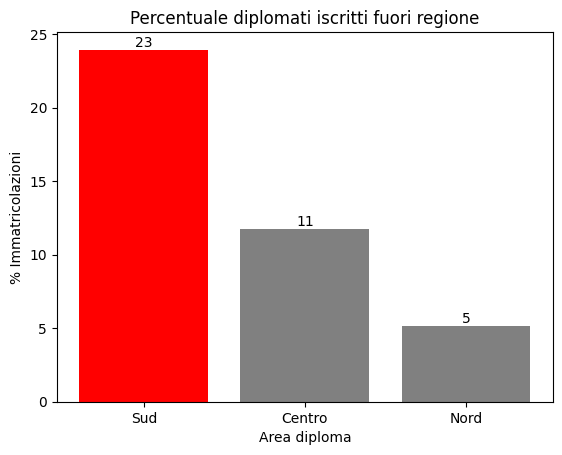

In [ ]:
# df_matr__22_23 = df_matr_fin[df_matr_fin['AnnoA']=='2022/2023']

df_matr_fin['immatricolati_fuori_area'] = np.where((df_matr_fin['Area Diploma']== df_matr_fin['Area Corso']), 0,1)

recap_emigranti = df_matr_fin.groupby(['Area Diploma', 'immatricolati_fuori_area']).agg(immatricolazioni=('Imm', 'sum')).reset_index()

recap_emigranti_looped = pd.DataFrame()


for area in recap_emigranti['Area Diploma'].unique():
    df_filtered = recap_emigranti[recap_emigranti['Area Diploma'] == area]
    den = df_filtered.immatricolazioni.sum(axis=0)
    df_filtered['%immatricolazioni'] = (df_filtered['immatricolazioni'] /  den)*100
    recap_emigranti_looped = pd.concat([recap_emigranti_looped, df_filtered])


recap_emigranti_looped = recap_emigranti_looped[recap_emigranti_looped['immatricolati_fuori_area']==1]

recap_emigranti_looped

# Definisci l'ordine desiderato
custom_order = ['Sud', 'Centro', 'Nord']

# Ordina il DataFrame in base all'ordine desiderato
recap_emigranti_looped = recap_emigranti_looped.set_index('Area Diploma').loc[custom_order].reset_index()

# Crea il grafico
plt.bar(recap_emigranti_looped['Area Diploma'], recap_emigranti_looped['%immatricolazioni'], color=['red', 'gray', 'gray'])

# Aggiungi etichette e titolo
plt.xlabel('Area diploma')
plt.ylabel('% Immatricolazioni')
plt.title('Percentuale diplomati iscritti fuori regione')

# Aggiungi etichette dei valori sulle barre
for i, value in enumerate(recap_emigranti_looped['%immatricolazioni']):
    plt.text(i, value, int(value), ha='center', va='bottom')




# Mostra il grafico
plt.show()

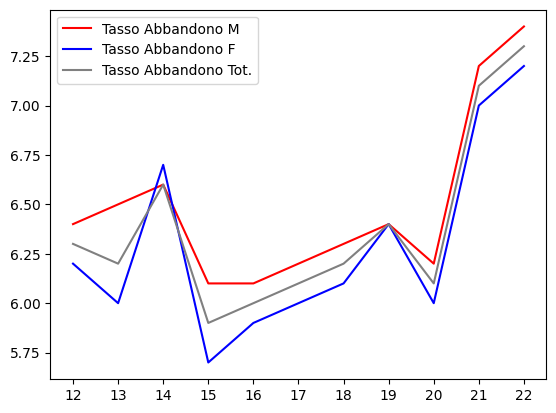

In [ ]:
url = "http://dati.ustat.miur.it/dataset/14aeb712-4665-4311-9e90-3e13639e8f50/resource/a5fbdbcc-387b-4a39-9b34-66468d269254/download/19_tassoabbandono.csv"

df_tasso_abbandono = pd.read_csv(url, sep=';', decimal='.')
df_tasso_abbandono['anno'] = df_tasso_abbandono['AnnoA'].apply(lambda x: x[-2:])

colonne = ['TA_M','TA_F','TA_TOT']

for i in colonne:
  df_tasso_abbandono[f'tasso_abbandono_{i}'] = pd.to_numeric(df_tasso_abbandono[i].str.replace(',', '.'))

df_tasso_abbandono = df_tasso_abbandono.sort_values('anno')
# Creazione del grafico con tre linee separate
plt.plot(df_tasso_abbandono['anno'], df_tasso_abbandono['tasso_abbandono_TA_M'], label='Tasso Abbandono M', color = 'red')
plt.plot(df_tasso_abbandono['anno'], df_tasso_abbandono['tasso_abbandono_TA_F'], label='Tasso Abbandono F', color = 'blue')
plt.plot(df_tasso_abbandono['anno'], df_tasso_abbandono['tasso_abbandono_TA_TOT'], label='Tasso Abbandono Tot.', color = 'grey')

# Aggiunta di una legenda
plt.legend()

# Visualizzazione del grafico
plt.show()


# ax = sns.lineplot(data=df_tasso_abbandono, x='anno', y='tasso_abbandono')



# # Ruota le label dell'asse x di 90 gradi
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# # Visualizza il grafico


# plt.show()
# # df_tasso_abbandono.info()



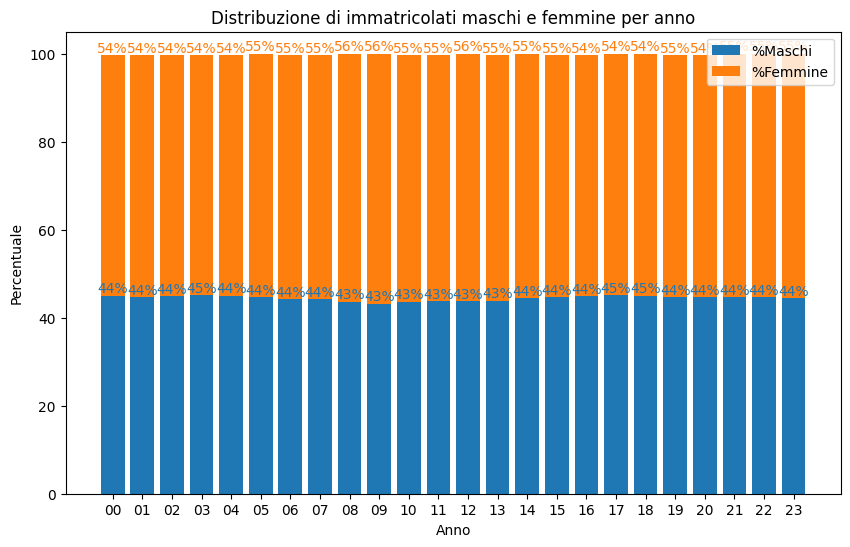

In [ ]:
##share immatricolati uomo donna


df_immatricolazioni_totali['share_m'] =(df_immatricolazioni_totali['immatricolazioni_maschi'] / df_immatricolazioni_totali['immatricolazioni_totali'])*100
df_immatricolazioni_totali['share_f'] =(df_immatricolazioni_totali['immatricolazioni_femmine'] / df_immatricolazioni_totali['immatricolazioni_totali'])*100

# Creazione del grafico a stacked column
plt.figure(figsize=(10, 6))  # Dimensioni del grafico

# Impilamento delle colonne
bars1 = plt.bar(df_immatricolazioni_totali['anno'], df_immatricolazioni_totali['share_m'], label='%Maschi')
bars2 = plt.bar(df_immatricolazioni_totali['anno'], df_immatricolazioni_totali['share_f'], bottom=df_immatricolazioni_totali['share_m'], label='%Femmine')

# Etichette e titoli del grafico
plt.xlabel('Anno')
plt.ylabel('Percentuale')
plt.title('Distribuzione di immatricolati maschi e femmine per anno')
plt.xticks(df_immatricolazioni_totali['anno'])
plt.legend()


for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height(), str(int(bar1.get_height())) + '%',
             ha='center', va='bottom', color=bar1.get_facecolor())
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + bar1.get_height(), str(int(bar2.get_height())) + '%',
             ha='center', va='bottom', color=bar2.get_facecolor())

# Visualizzazione del grafico
plt.show()